# Prediction of  possible loan defaulters

Loan Prediction based on Customer Behaviour

### Import necessary modules

In [1]:
import warnings
warnings.filterwarnings("ignore")

import time
from time import process_time 

import numpy as np
import pandas as pd

pd.set_option('display.float_format', lambda x: '%.2f' % x)
pd.options.display.max_columns = 100
pd.options.display.max_rows = 100

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from imblearn.over_sampling import RandomOverSampler 
from collections import Counter

from sklearn.model_selection import train_test_split

from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

from sklearn.metrics import *

### Load Dataset

In [2]:
df = pd.read_csv("Training Data.csv")
dft = pd.read_csv("Test Data.csv")

### Explore the data set

In [3]:
df.head()

,Id,Income,Age,Experience,Married/Single,House_Ownership,Car_Ownership,Profession,CITY,STATE,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS,Risk_Flag
0,1,1303834,23,3,single,rented,no,Mechanical_engineer,Rewa,Madhya_Pradesh,3,13,0
1,2,7574516,40,10,single,rented,no,Software_Developer,Parbhani,Maharashtra,9,13,0
2,3,3991815,66,4,married,rented,no,Technical_writer,Alappuzha,Kerala,4,10,0
3,4,6256451,41,2,single,rented,yes,Software_Developer,Bhubaneswar,Odisha,2,12,1
4,5,5768871,47,11,single,rented,no,Civil_servant,Tiruchirappalli[10],Tamil_Nadu,3,14,1


In [4]:
dft.head()

,ID,Income,Age,Experience,Married/Single,House_Ownership,Car_Ownership,Profession,CITY,STATE,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS
0,1,7393090,59,19,single,rented,no,Geologist,Malda,West Bengal,4,13
1,2,1215004,25,5,single,rented,no,Firefighter,Jalna,Maharashtra,5,10
2,3,8901342,50,12,single,rented,no,Lawyer,Thane,Maharashtra,9,14
3,4,1944421,49,9,married,rented,yes,Analyst,Latur,Maharashtra,3,12
4,5,13429,25,18,single,rented,yes,Comedian,Berhampore,West Bengal,13,11


In [5]:
print('Train set:')
rows, columns = df.shape
print('Rows =', rows)
print('Columns =', columns)
print('Size =', df.size)

print('\n')

print('Test set:')
rowst, columnst = dft.shape
print('Rows =', rowst)
print('Columns =', columnst)
print('Size =', dft.size)

Train set:
Rows = 252000
Columns = 13
Size = 3276000


Test set:
Rows = 28000
Columns = 12
Size = 336000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 252000 entries, 0 to 251999
Data columns (total 13 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   Id                 252000 non-null  int64 
 1   Income             252000 non-null  int64 
 2   Age                252000 non-null  int64 
 3   Experience         252000 non-null  int64 
 4   Married/Single     252000 non-null  object
 5   House_Ownership    252000 non-null  object
 6   Car_Ownership      252000 non-null  object
 7   Profession         252000 non-null  object
 8   CITY               252000 non-null  object
 9   STATE              252000 non-null  object
 10  CURRENT_JOB_YRS    252000 non-null  int64 
 11  CURRENT_HOUSE_YRS  252000 non-null  int64 
 12  Risk_Flag          252000 non-null  int64 
dtypes: int64(7), object(6)
memory usage: 25.0+ MB


In [7]:
df.describe(include='all')

,Id,Income,Age,Experience,Married/Single,House_Ownership,Car_Ownership,Profession,CITY,STATE,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS,Risk_Flag
count,252000.00,252000.00,252000.00,252000.00,252000,252000,252000,252000,252000,252000,252000.00,252000.00,252000.00
unique,NaN,NaN,NaN,NaN,2,3,2,51,317,29,NaN,NaN,NaN
top,NaN,NaN,NaN,NaN,single,rented,no,Physician,Vijayanagaram,Uttar_Pradesh,NaN,NaN,NaN
freq,NaN,NaN,NaN,NaN,226272,231898,176000,5957,1259,28400,NaN,NaN,NaN
mean,126000.50,4997116.67,49.95,10.08,NaN,NaN,NaN,NaN,NaN,NaN,6.33,12.00,0.12
std,72746.28,2878311.01,17.06,6.00,NaN,NaN,NaN,NaN,NaN,NaN,3.65,1.40,0.33
min,1.00,10310.00,21.00,0.00,NaN,NaN,NaN,NaN,NaN,NaN,0.00,10.00,0.00
25%,63000.75,2503015.00,35.00,5.00,NaN,NaN,NaN,NaN,NaN,NaN,3.00,11.00,0.00
50%,126000.50,5000694.50,50.00,10.00,NaN,NaN,NaN,NaN,NaN,NaN,6.00,12.00,0.00
75%,189000.25,7477502.00,65.00,15.00,NaN,NaN,NaN,NaN,NaN,NaN,9.00,13.00,0.00


In [8]:
df["Risk_Flag"].value_counts()

0    221004
1     30996
Name: Risk_Flag, dtype: int64

# Analysing the dataset

## Analysing Numerical columns

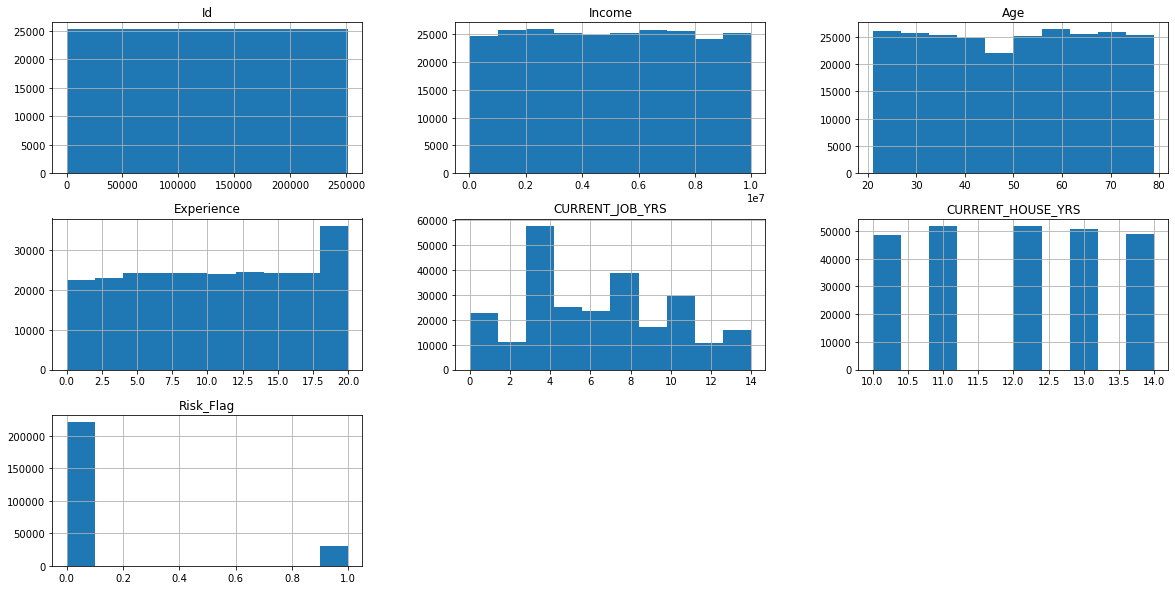

In [9]:
df.hist(figsize = (20, 10))
plt.show()

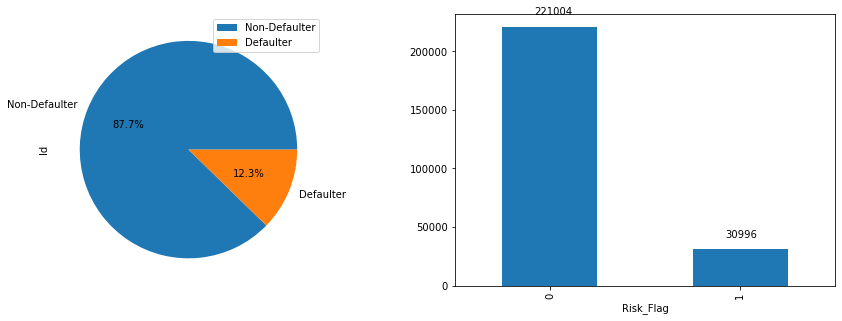

In [10]:
fig, (ax1,ax2) = plt.subplots(1,2)

df.groupby('Risk_Flag').count()['Id'].plot(kind='pie', 
                                           labels=['Non-Defaulter','Defaulter'], 
                                           autopct='%1.1f%%', 
                                           ax=ax1, 
                                           figsize=(15,5))
ax1.set_title('')
ax1.legend(loc='best')

df.groupby('Risk_Flag').count()['Id'].plot(kind='bar', ax=ax2, figsize=(15,5))
ax2.set_title('')

for index,value in enumerate(df.groupby('Risk_Flag').count()['Id']):
    plt.text(index-0.08,value+10000,str(value))
plt.show()

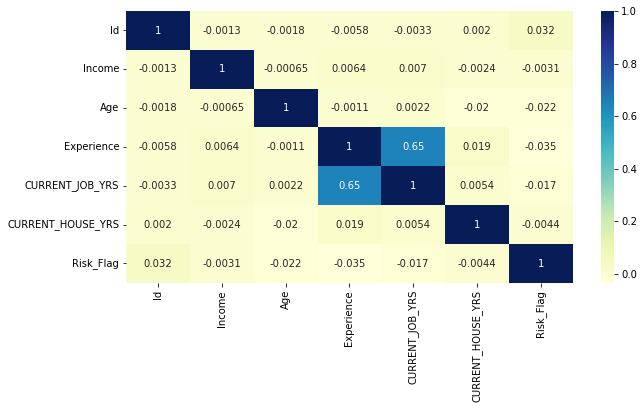

In [11]:
plt.figure(figsize = (10,5))
sns.heatmap(df.corr(), annot=True, cmap='YlGnBu')
plt.show()

## Analysing the Categorical features

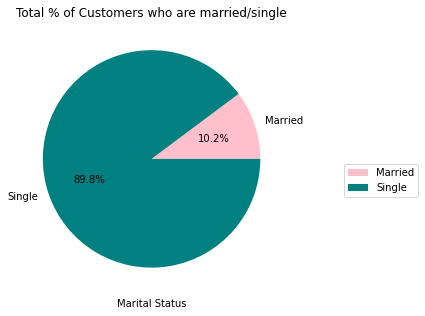

In [12]:
df.groupby('Married/Single').count()['Id'].plot(kind='pie',
                                                startangle=0,
                                                labels=['Married','Single'],
                                                autopct='%1.1f%%',
                                                colors=['Pink','Teal'], 
                                                figsize=(10,5))
plt.ylabel('')
plt.xlabel('Marital Status')
plt.title('Total % of Customers who are married/single')
plt.legend(loc='best',bbox_to_anchor=(1,0,0.5,0.5))
plt.show()

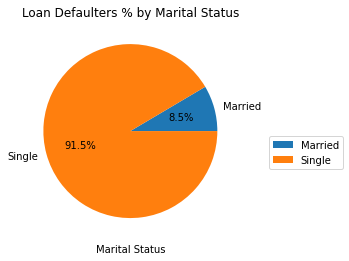

In [13]:
df.loc[df['Risk_Flag'] == 1].groupby('Married/Single').count()['Id']

marital_status = df.loc[df['Risk_Flag'] == 1].groupby('Married/Single').count()['Id']
marital_status.plot(kind='pie',startangle=0,labels=['Married','Single'],autopct='%1.1f%%')
plt.ylabel('')
plt.xlabel('Marital Status')
plt.title('Loan Defaulters % by Marital Status')
plt.legend(loc='best',bbox_to_anchor=(1,0,0.5,0.5))
plt.show()

(0.0, 250000.0)

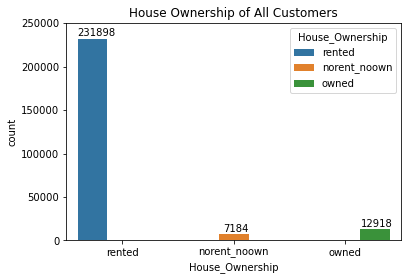

In [14]:
house_ownership_count = df.groupby('House_Ownership').count()['Id']
house_ownership_count = [231898,7184,12918]


sns.countplot(data=df,x='House_Ownership',hue='House_Ownership',)
plt.text(-0.4,235000,str(231898))
plt.text(0.9,10000,str(7184))
plt.text(2.14,16000,str(12918))
plt.title('House Ownership of All Customers')
plt.ylim(0,250000)

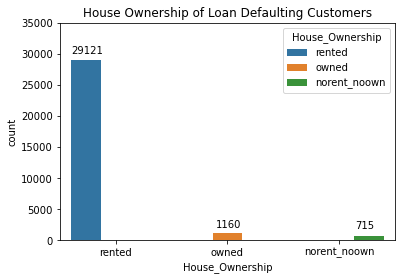

In [15]:
df.loc[df['Risk_Flag'] == 1].groupby('House_Ownership').count()['Id']

sns.countplot(data=df.loc[df['Risk_Flag'] == 1],x='House_Ownership',hue='House_Ownership')
plt.text(-0.4,30000,str(29121))
plt.text(0.9,2000,str(1160))
plt.text(2.14,1800,str(715))
plt.ylim(0,35000)
plt.title('House Ownership of Loan Defaulting Customers')
plt.show()

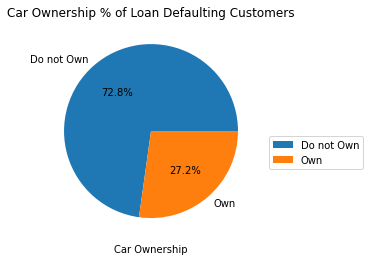

In [16]:
car_ownership_default = df.loc[df['Risk_Flag'] == 1].groupby('Car_Ownership').count()['Id']
car_ownership_default.plot(kind='pie',startangle=0,labels=['Do not Own','Own'],autopct='%1.1f%%')
plt.ylabel('')
plt.xlabel('Car Ownership')
plt.title('Car Ownership % of Loan Defaulting Customers')
plt.legend(loc='best',bbox_to_anchor=(1,0,0.5,0.5))
plt.show()

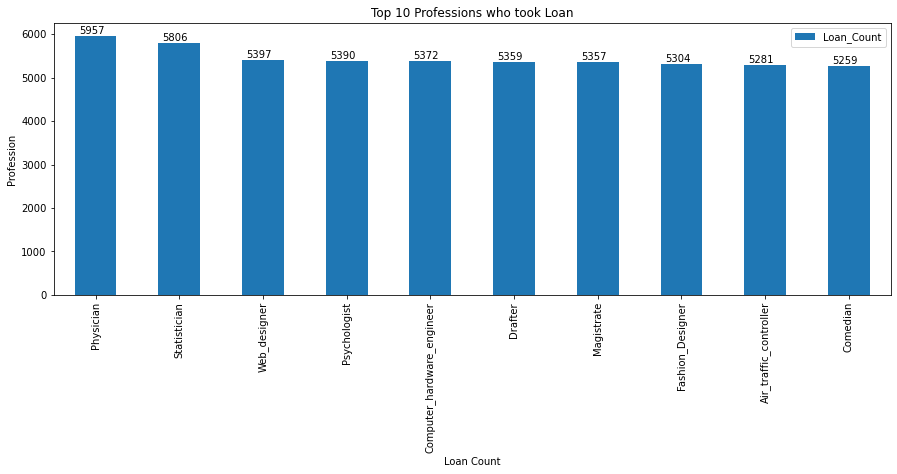

In [17]:
df_profession_loan_count = df.groupby('Profession').count()['Id'].sort_values(ascending=False)
df_plc = df_profession_loan_count.reset_index()
df_plc.rename(columns= {'Id':'Loan_Count'},inplace=True)
df_plc[:10].plot(kind='bar',x='Profession',figsize=(15,5))
plt.legend(loc='best')
plt.title('Top 10 Professions who took Loan')
plt.xlabel('Loan Count')
plt.ylabel('Profession')
for index,value in enumerate(df_plc['Loan_Count'][:10]):
    plt.text(index-0.2,value+50,str(value))
plt.show()   

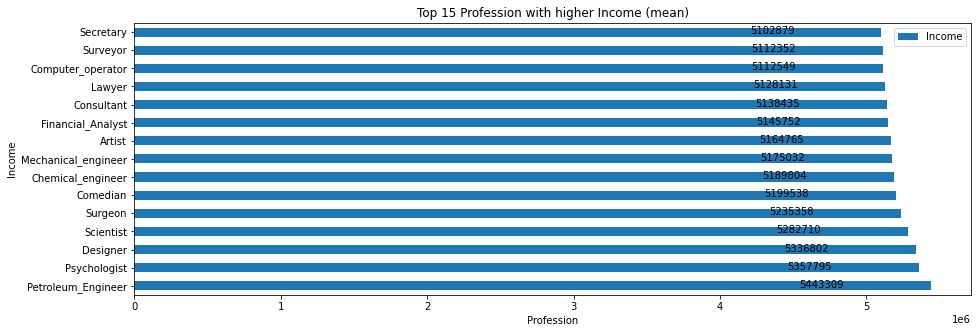

In [18]:
profession = df.groupby(['Profession']).mean()[['Income','Risk_Flag']]

profession_top10_income = profession['Income'].sort_values(ascending=False)[:15]
profession_top10_income.plot(kind='barh',figsize=(15,5))
plt.title('Top 15 Profession with higher Income (mean)')
plt.xlabel('Profession')
plt.ylabel('Income')

for index,value in enumerate(profession_top10_income):
    plt.text(value-900000,index-0.1,str(int(value)))
plt.legend(loc='best')
plt.show()

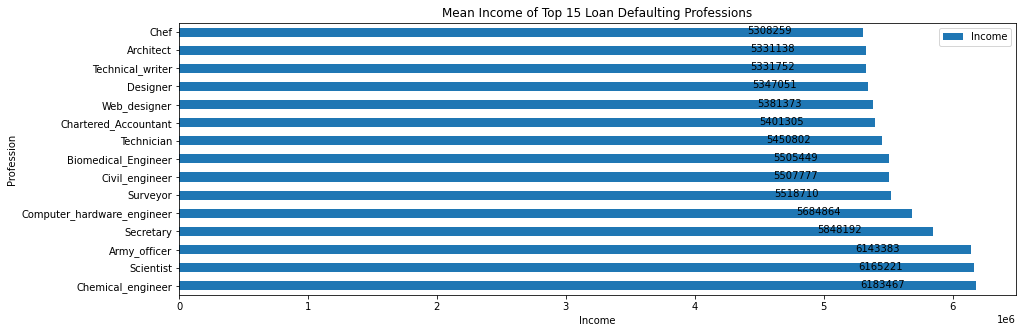

In [19]:
df_ = df.loc[df['Risk_Flag'] == 1].groupby(['Profession']).mean()[['Income']].sort_values(by='Income',ascending=False)
df_.sort_values(by='Income',ascending=False)[:15].plot(kind='barh',figsize=(15,5))
plt.title('Mean Income of Top 15 Loan Defaulting Professions') 
plt.xlabel('Income')
plt.ylabel('Profession')
for index,value in enumerate(df_['Income'][:15]):
    plt.text(value-900000,index-0.1,str(int(value)))

plt.legend(loc='best')
plt.show()

## Pre-Processing the dataset

#### 1. Dropping the unwanted column: 

In [3]:
df.drop(['Id','CURRENT_JOB_YRS','CITY','STATE'], axis=1, inplace=True)

In [4]:
dft.drop(['ID','CURRENT_JOB_YRS','CITY','STATE'], axis=1, inplace=True)

#### 2. Identify missing values: 

In [5]:
df.isnull().sum().sum()

0

In [6]:
dft.isnull().sum().sum()

0

#### 3. Converting categorical variables to numeric:

The following encoding will be done to the categorical features:

marital_status, car_ownership – binarise

profession – count encoding

house_ownership – one-hot

In [7]:
df['Married/Single'].replace({'married':1, 'single':0}, inplace=True)
df['Car_Ownership'].replace({'yes':1, 'no':0}, inplace=True)

In [8]:
dft['Married/Single'].replace({'married':1, 'single':0}, inplace=True)
dft['Car_Ownership'].replace({'yes':1, 'no':0}, inplace=True)

In [10]:
df['Profession'].unique()

array(['Mechanical_engineer', 'Software_Developer', 'Technical_writer',
       'Civil_servant', 'Librarian', 'Economist', 'Flight_attendant',
       'Architect', 'Designer', 'Physician', 'Financial_Analyst',
       'Air_traffic_controller', 'Politician', 'Police_officer', 'Artist',
       'Surveyor', 'Design_Engineer', 'Chemical_engineer',
       'Hotel_Manager', 'Dentist', 'Comedian', 'Biomedical_Engineer',
       'Graphic_Designer', 'Computer_hardware_engineer',
       'Petroleum_Engineer', 'Secretary', 'Computer_operator',
       'Chartered_Accountant', 'Technician', 'Microbiologist',
       'Fashion_Designer', 'Aviator', 'Psychologist', 'Magistrate',
       'Lawyer', 'Firefighter', 'Engineer', 'Official', 'Analyst',
       'Geologist', 'Drafter', 'Statistician', 'Web_designer',
       'Consultant', 'Chef', 'Army_officer', 'Surgeon', 'Scientist',
       'Civil_engineer', 'Industrial_Engineer', 'Technology_specialist'],
      dtype=object)

In [9]:
df_frequency = df['Profession'].value_counts().to_dict()
df_frequency

{'Physician': 5957,
 'Statistician': 5806,
 'Web_designer': 5397,
 'Psychologist': 5390,
 'Computer_hardware_engineer': 5372,
 'Drafter': 5359,
 'Magistrate': 5357,
 'Fashion_Designer': 5304,
 'Air_traffic_controller': 5281,
 'Comedian': 5259,
 'Industrial_Engineer': 5250,
 'Mechanical_engineer': 5217,
 'Chemical_engineer': 5205,
 'Technical_writer': 5195,
 'Hotel_Manager': 5178,
 'Financial_Analyst': 5167,
 'Graphic_Designer': 5166,
 'Flight_attendant': 5128,
 'Biomedical_Engineer': 5127,
 'Secretary': 5061,
 'Software_Developer': 5053,
 'Petroleum_Engineer': 5041,
 'Police_officer': 5035,
 'Computer_operator': 4990,
 'Politician': 4944,
 'Microbiologist': 4881,
 'Technician': 4864,
 'Artist': 4861,
 'Lawyer': 4818,
 'Consultant': 4808,
 'Dentist': 4782,
 'Scientist': 4781,
 'Surgeon': 4772,
 'Aviator': 4758,
 'Technology_specialist': 4737,
 'Design_Engineer': 4729,
 'Surveyor': 4714,
 'Geologist': 4672,
 'Analyst': 4668,
 'Army_officer': 4661,
 'Architect': 4657,
 'Chef': 4635,
 'Lib

In [26]:
df_frequency = df['Profession'].value_counts().to_dict()
df['Profession'] = df['Profession'].map(df_frequency)

In [27]:
df_frequency = dft['Profession'].value_counts().to_dict()
dft['Profession'] = dft['Profession'].map(df_frequency)

In [28]:
df = pd.get_dummies(df)

In [29]:
dft = pd.get_dummies(dft)

In [30]:
df.head(3)

,Income,Age,Experience,Married/Single,Car_Ownership,Profession,CURRENT_HOUSE_YRS,Risk_Flag,House_Ownership_norent_noown,House_Ownership_owned,House_Ownership_rented
0,1303834,23,3,0,0,5217,13,0,0,0,1
1,7574516,40,10,0,0,5053,13,0,0,0,1
2,3991815,66,4,1,0,5195,10,0,0,0,1


In [31]:
dft.head(3)

,Income,Age,Experience,Married/Single,Car_Ownership,Profession,CURRENT_HOUSE_YRS,House_Ownership_norent_noown,House_Ownership_owned,House_Ownership_rented
0,7393090,59,19,0,0,495,13,0,0,1
1,1215004,25,5,0,0,539,10,0,0,1
2,8901342,50,12,0,0,510,14,0,0,1


In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 252000 entries, 0 to 251999
Data columns (total 11 columns):
 #   Column                        Non-Null Count   Dtype
---  ------                        --------------   -----
 0   Income                        252000 non-null  int64
 1   Age                           252000 non-null  int64
 2   Experience                    252000 non-null  int64
 3   Married/Single                252000 non-null  int64
 4   Car_Ownership                 252000 non-null  int64
 5   Profession                    252000 non-null  int64
 6   CURRENT_HOUSE_YRS             252000 non-null  int64
 7   Risk_Flag                     252000 non-null  int64
 8   House_Ownership_norent_noown  252000 non-null  uint8
 9   House_Ownership_owned         252000 non-null  uint8
 10  House_Ownership_rented        252000 non-null  uint8
dtypes: int64(8), uint8(3)
memory usage: 16.1 MB


In [33]:
dft.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28000 entries, 0 to 27999
Data columns (total 10 columns):
 #   Column                        Non-Null Count  Dtype
---  ------                        --------------  -----
 0   Income                        28000 non-null  int64
 1   Age                           28000 non-null  int64
 2   Experience                    28000 non-null  int64
 3   Married/Single                28000 non-null  int64
 4   Car_Ownership                 28000 non-null  int64
 5   Profession                    28000 non-null  int64
 6   CURRENT_HOUSE_YRS             28000 non-null  int64
 7   House_Ownership_norent_noown  28000 non-null  uint8
 8   House_Ownership_owned         28000 non-null  uint8
 9   House_Ownership_rented        28000 non-null  uint8
dtypes: int64(7), uint8(3)
memory usage: 1.6 MB


In [34]:
df.to_csv(r"C:\Users\kiruba-haran\Desktop\PML Micro Project\ppdata.csv", header=True, index=False)

In [35]:
dft.to_csv(r"C:\Users\kiruba-haran\Desktop\PML Micro Project\ppdatat.csv", header=True, index=False)

#### Resampling the Data with Random Oversampler

In [36]:
pp = pd.read_csv("ppdata.csv")
ppt = pd.read_csv("ppdatat.csv")

In [37]:
X = pp.drop("Risk_Flag", axis=1)
y = pp["Risk_Flag"]

In [38]:
sampler = RandomOverSampler(random_state=42, sampling_strategy=0.45)

X_sampled, y_sampled = sampler.fit_resample(X,y)

In [39]:
print(Counter(y),Counter(y_sampled))

Counter({0: 221004, 1: 30996}) Counter({0: 221004, 1: 99451})


In [40]:
df1 = pd.concat([X_sampled,y_sampled], axis=1)

### Splitting the data into train and test splits

In [41]:
X = df1.drop("Risk_Flag", axis=1)
y = df1["Risk_Flag"]

In [42]:
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.3, random_state=42)

## Model Building:

In [43]:
classifiers = { 
    "DTC": DecisionTreeClassifier(),
    "RFC": RandomForestClassifier(),
    "KNN": KNeighborsClassifier(),
}

no_classifiers = len(classifiers.keys())

def classify(X_train, y_train, X_test, y_test, verbose = True):
    
    df_results = pd.DataFrame(data=np.zeros(shape=(no_classifiers, 7)), 
                              columns = ['Classifier',
                                         'F1 Score',
                                         'Accuracy',
                                         'Precision',
                                         'Recall',
                                         'AUC',
                                         'Training time'])
    
    count = 0
    for key, classifier in classifiers.items():
        
        t_start = process_time()  
        classifier.fit(X_train, y_train)
        
        t_stop = process_time() 
        t_elapsed = t_stop - t_start
        
        y_pred = classifier.predict(X_test)
        
        df_results.loc[count,'Classifier'] = key
        df_results.loc[count,'F1 Score'] = f1_score(y_test, y_pred)
        df_results.loc[count,'Accuracy'] = accuracy_score(y_test, y_pred)
        df_results.loc[count,'Precision'] = precision_score(y_test, y_pred)
        df_results.loc[count,'Recall'] = recall_score(y_test, y_pred)
        df_results.loc[count,'AUC'] = roc_auc_score(y_test, y_pred)
        df_results.loc[count,'Training time'] = t_elapsed
        
        count+=1

    return df_results

In [44]:
df_results = classify(X_train, y_train, X_test, y_test)
df_results.sort_values(by='Accuracy', ascending=False)

,Classifier,F1 Score,Accuracy,Precision,Recall,AUC,Training time
1,RFC,0.90,0.93,0.83,0.97,0.94,44.84
0,DTC,0.87,0.91,0.79,0.98,0.93,1.83
2,KNN,0.81,0.88,0.76,0.86,0.87,3.67


## Model Evaluation

Metrics for training set:
Accuracy =  0.9303493972143919 

F1 Score =  0.8957074325587191 

Report:
               precision    recall  f1-score   support

           0       0.99      0.91      0.95     66611
           1       0.83      0.97      0.90     29526

    accuracy                           0.93     96137
   macro avg       0.91      0.94      0.92     96137
weighted avg       0.94      0.93      0.93     96137

Confusion Matrix:


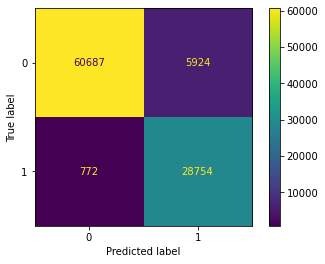

In [45]:
rfc = RandomForestClassifier()

rfc.fit(X_train, y_train)

y_pred = rfc.predict(X_test)

print('Metrics for training set:')

print('Accuracy = ', accuracy_score(y_test, y_pred), '\n')

print('F1 Score = ', f1_score(y_test, y_pred), '\n')

print('Report:\n', classification_report(y_test, y_pred))

print('Confusion Matrix:')
plot_confusion_matrix(rfc, X_test, y_test)
plt.show()

In [46]:
rfc1 = RandomForestClassifier()

rfc1.fit(X_train, y_train)

y_pred_ppt = rfc1.predict(ppt)

print('Accuracy for testing set = ', rfc1.score(ppt, y_pred_ppt))

Accuracy for testing set =  1.0


### Plotting ROC Curve

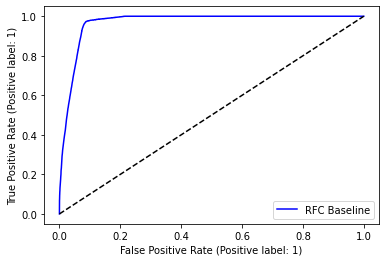

In [47]:
plot_roc_curve(rfc, X_test, y_test, linestyle='-',color='blue',label='RFC Baseline')
plt.plot([0,1],[0,1], "--", c='black')
plt.show()